In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load your dataset
data = pd.read_csv('/Meta_Stock_Analysis_Data.csv')



In [ ]:
import pandas as pd

# Assuming your DataFrame is called 'data'

# Drop rows where 'Returns' column has null values
data.dropna(subset=['Returns'], inplace=True)

# Drop rows where 'VolumeMovingAverage_10' column has null values
data.dropna(subset=['VolumeMovingAverage_10'], inplace=True)

# Drop rows where 'PriceLag_1' column has null values
data.dropna(subset=['PriceLag_1'], inplace=True)

# Drop rows where 'ReturnLag_1' column has null values
data.dropna(subset=['ReturnLag_1'], inplace=True)

# Drop rows where 'PriceLag_3' column has null values
data.dropna(subset=['PriceLag_3'], inplace=True)

# Drop rows where 'ReturnLag_3' column has null values
data.dropna(subset=['ReturnLag_3'], inplace=True)

# Drop rows where 'PriceLag_5' column has null values
data.dropna(subset=['PriceLag_5'], inplace=True)

# Drop rows where 'ReturnLag_5' column has null values
data.dropna(subset=['ReturnLag_5'], inplace=True)


In [ ]:
data.drop("Date", axis=1, inplace=True)

In [ ]:
data['Volatility']=np.log10(data['Volatility'])
data['HighLowRange']=np.log10(data['HighLowRange'])
data['VolumeMovingAverage_10']=np.log10(data['VolumeMovingAverage_10'])
data['UNRATE']=np.log10(data['UNRATE'])

In [ ]:
columns_to_keep = ['Open','Volume','VolumeChange','Momentum','MovingAverage_50', 'Volatility', 'PriceLag_1','ReturnLag_5', 'Close']

# Assuming your DataFrame is named 'df'
data = data[columns_to_keep].reset_index(drop=True)


In [ ]:
data.head()

,Open,Volume,VolumeChange,Momentum,MovingAverage_50,Volatility,PriceLag_1,ReturnLag_5,Close
0,28.889999,41855500,-0.625082,NaN,NaN,0.069421,29.600000,0.032187,27.719999
1,27.200001,35230300,-0.158287,-11.330000,NaN,-0.093306,27.719999,-0.033909,26.900000
2,26.700001,42473400,0.205593,-8.159998,NaN,0.127105,26.900000,-0.096208,25.870001
3,26.070000,61489200,0.447711,-4.190001,NaN,0.041393,25.870001,-0.022538,26.809999
4,27.000000,26159500,-0.574568,-5.690001,NaN,-0.096910,26.809999,0.050018,26.309999


In [ ]:
#scaled_value = (original_value - mean) / std
row_data = data['Open']

row_mean = np.mean(row_data)
row_std = np.std(row_data)
print(row_mean,row_std)

149.29798540417613 85.88414893602835


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)

In [ ]:
#Since we are getting an error suggesting nans or infs or out of range nums exist.
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)

In [ ]:
# Split the data into features (X) and target variable (y)
input = data.drop('Close', axis=1)
output = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)
X = X_train
y = y_train



In [ ]:
# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# LASSO
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# XGBoost
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Feature importance using Ridge regression
ridge_feature_importance = np.abs(ridge.coef_)

# Feature importance using LASSO
lasso_feature_importance = np.abs(lasso.coef_)

# Feature importance using Random Forest
rf_feature_importance = rf.feature_importances_

# Feature importance using XGBoost
xgboost_feature_importance = xgboost.feature_importances_



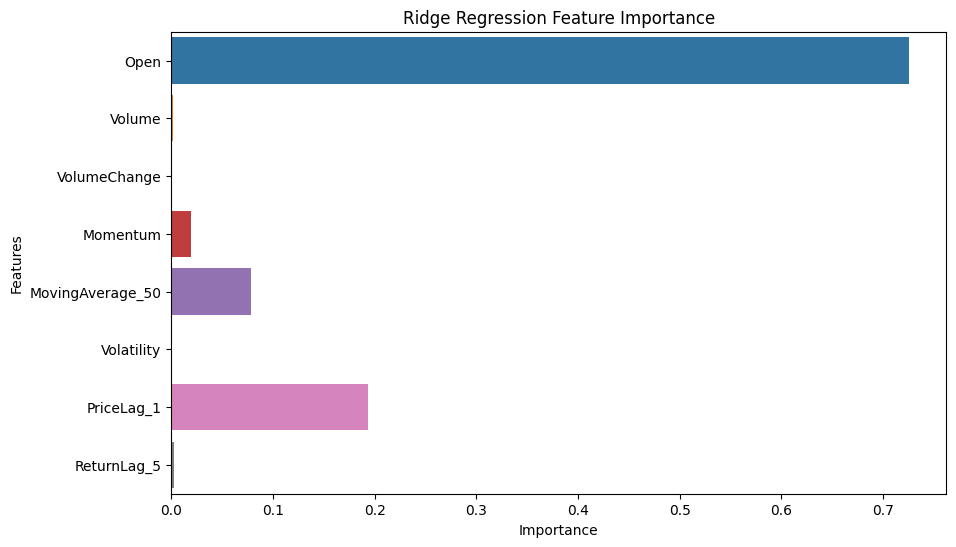

In [ ]:
# Plot feature importance using Ridge regression
plt.figure(figsize=(10, 6))
sns.barplot(x=ridge_feature_importance, y=X.columns)
plt.title('Ridge Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



In [ ]:
# OLS table for Ridge regression
X_train_ols = sm.add_constant(X_train)
ridge_ols = sm.OLS(y_train, X_train_ols).fit()
print(ridge_ols.summary())



                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.534e+05
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:14:59   Log-Likelihood:                 4370.7
No. Observations:                2164   AIC:                            -8723.
Df Residuals:                    2155   BIC:                            -8672.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0012      0.001  

In [ ]:
# OLS table for LASSO
X_train_ols = sm.add_constant(X_train)
lasso_ols = sm.OLS(y_train, X_train_ols).fit()
print(lasso_ols.summary())



                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.534e+05
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:14:59   Log-Likelihood:                 4370.7
No. Observations:                2164   AIC:                            -8723.
Df Residuals:                    2155   BIC:                            -8672.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0012      0.001  

In [ ]:
# Perform feature selection using Ridge regression
threshold = 0.1
selected_features_ridge = X.columns[ridge_feature_importance > threshold]



In [ ]:
# Perform feature selection using LASSO
selected_features_lasso = X.columns[lasso_feature_importance > threshold]



In [ ]:
# Print the selected features
print("Selected Features (Ridge Regression):")
print(selected_features_ridge)
print()

print("Selected Features (LASSO):")
print(selected_features_lasso)


Selected Features (Ridge Regression):
Index(['Open', 'PriceLag_1'], dtype='object')

Selected Features (LASSO):
Index([], dtype='object')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define the parameter grids for each model
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                'fit_intercept': [True, False],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                'fit_intercept': [True, False],
                'selection': ['cyclic', 'random']}
elasticnet_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                     'l1_ratio': [0.2, 0.5, 0.8],
                     'fit_intercept': [True, False],
                     'selection': ['cyclic', 'random']}

rf_params = {'n_estimators': [100, 200, 300, 400],
             'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
xgb_params = {'n_estimators': [100, 200, 300, 400],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01, 0.001],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0]}

# Create the models
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
rf = RandomForestRegressor()
xgb = XGBRegressor()

# Perform grid search with cross-validation for each model
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X, y)



# Print the best hyperparameters and best scores for each model
print("Ridge Regression - Best Hyperparameters: ", ridge_grid.best_params_)
print("Ridge Regression - Best Score: ", ridge_grid.best_score_)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Ridge Regression - Best Hyperparameters:  {'alpha': 0.01, 'fit_intercept': False, 'solver': 'lsqr'}
Ridge Regression - Best Score:  0.9989086518799141


In [ ]:
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X, y)

print("Lasso Regression - Best Hyperparameters: ", lasso_grid.best_params_)
print("Lasso Regression - Best Score: ", lasso_grid.best_score_)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.232e-01, tolerance: 1.696e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.008e-01, tolerance: 1.671e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.198e-01, tolerance: 1.712e

Lasso Regression - Best Hyperparameters:  {'alpha': 0.01, 'fit_intercept': False, 'selection': 'cyclic'}
Lasso Regression - Best Score:  0.9986657588825374


In [ ]:
elasticnet_grid = GridSearchCV(elasticnet, elasticnet_params, cv=5)
elasticnet_grid.fit(X, y)

print("ElasticNet Regression - Best Hyperparameters: ", elasticnet_grid.best_params_)
print("ElasticNet Regression - Best Score: ", elasticnet_grid.best_score_)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.769e-01, tolerance: 1.726e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet Regression - Best Hyperparameters:  {'alpha': 0.01, 'fit_intercept': False, 'l1_ratio': 0.8, 'selection': 'cyclic'}
ElasticNet Regression - Best Score:  0.9985916690505828


In [ ]:
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X, y)


print("Random Forest - Best Hyperparameters: ", rf_grid.best_params_)
print("Random Forest - Best Score: ", rf_grid.best_score_)



Random Forest - Best Hyperparameters:  {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest - Best Score:  0.9986097263126708


In [ ]:
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5)
xgb_grid.fit(X, y)



In [ ]:
print("XGBoost - Best Hyperparameters: ", xgb_grid.best_params_)
print("XGBoost - Best Score: ", xgb_grid.best_score_)

XGBoost - Best Hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
XGBoost - Best Score:  0.998768125019262


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create the models with the best hyperparameters
ridge = Ridge(alpha=0.01, fit_intercept=False, solver='lsqr')
lasso = Lasso(alpha=0.01, fit_intercept=False, selection='cyclic')
elasticnet = ElasticNet(alpha=0.01, fit_intercept=False, l1_ratio=0.8, selection='cyclic')
rf = RandomForestRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100)
xgb = XGBRegressor(colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6)

# Fit the models with the training data
ridge.fit(X, y)
lasso.fit(X, y)
elasticnet.fit(X, y)
rf.fit(X, y)
xgb.fit(X, y)

# Perform predictions on the test data
ridge_predictions = ridge.predict(X_test)
lasso_predictions = lasso.predict(X_test)
elasticnet_predictions = elasticnet.predict(X_test)
rf_predictions = rf.predict(X_test)
xgb_predictions = xgb.predict(X_test)

# Calculate RMSE
ridge_rmse = sqrt(mean_squared_error(y_test, ridge_predictions))
lasso_rmse = sqrt(mean_squared_error(y_test, lasso_predictions))
elasticnet_rmse = sqrt(mean_squared_error(y_test, elasticnet_predictions))
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))

# Print the RMSE for each model

print("Ridge Regression - RMSE: ", ridge_rmse)

print("Lasso Regression - RMSE: ", lasso_rmse)

print("ElasticNet Regression - RMSE: ", elasticnet_rmse)

print("Random Forest - RMSE: ", rf_rmse)

print("XGBoost - RMSE: ", xgb_rmse)


Ridge Regression - RMSE:  0.032124690527866075
Lasso Regression - RMSE:  0.034204857526220545
ElasticNet Regression - RMSE:  0.03584818966770281
Random Forest - RMSE:  0.03461735372128882
XGBoost - RMSE:  0.03244177606028449


In [ ]:
#Kalman filter
import numpy as np
from numpy import transpose, array
from numpy.linalg import inv


param0=[1.5, 1.5]

def kf_train(Y):
    Y = np.array(Y)
    Y = transpose(array(Y))
    T = Y.shape[0]


    # initial values
    x_init = np.array([[280], [0.03]]) # two states: stock price, percentage change in stock price
    P_init = 900 * np.eye(len(x_init))

    # 2x2 identity matrix
    Idn = np.eye(2)

    # allocate result matrices
    x_predict = np.zeros((T, 2, 1))      # prediction of state vector
    P_predict = np.zeros((T, 2, 2))  # prediction error covariance matrix
    x_update = np.zeros((T, 2, 1))       # estimation of state vector
    P_update = np.zeros((T, 2, 2))   # estimation error covariance matrix


    K = np.zeros((T, 2, 1))       # Kalman Gain
    v = np.zeros((T, 1, 1))  # error of estimate
    F = np.zeros((T, 1, 1))

    # initial x
    x_update[0] = x_init
    P_update[0] = P_init
    x_predict[0] = x_init
    P_predict[0] = P_init

    q= param0[0]
    r= param0[1]

    # matrices
    t = 1
    A = array([[1, t], [0, 1]])
    Q = q*array([[1, 0], [0, 1]])
    H = array([1, 0])
    H.shape = (1, 2)
    R = r*np.eye(1)
    v = np.zeros((T, 1, 1))

    for i in range(T):
        # prediction stage
        if i > 0:
            x_predict[i] = A @ x_update[i-1]
            P_predict[i] = A @ P_update[i-1] @ transpose(A) + Q

        # estimation stage
        v[i] = Y[i] - H @ A @ x_update[i-1]
        F[i] = H @ P_predict[i] @ transpose(H) + R

        K[i] = P_predict[i] @ transpose(H) @ inv((H @ P_predict[i] @ transpose(H)) + R)

        x_update[i] = x_predict[i] + K[i] @ v[i]
        P_update[i] = (Idn - K[i] @ H) @ P_predict[i]

    "smoother"
    L = np.zeros((T,2,2))

    x_smooth = np.zeros((T, 2, 1))
    P_smooth = np.zeros((T, 2, 2))

    x_smooth[T-1] = x_update[T-1]
    P_smooth[T-1] = P_update[T-1]


    for t in range(T-1,0,-1): #range(start, stop, step)
        L[t-1] = P_update[t-1] @ transpose(A) @ inv(P_predict[t-1])
        x_smooth[t-1] = x_update[t-1] + L[t-1] @ (x_smooth[t]-A @ x_update[t])
        P_smooth[t-1] = P_update[t-1] + L[t-1] @ (P_smooth[t]-P_update[t]) @ transpose(L[t-1])


    x_update.shape=(Y.shape[0],2,)
    x_smooth.shape=(Y.shape[0],2,)

    #one step forward prediction
    y_pred = A @ x_smooth[T-1]

    return x_smooth[:, 0], y_pred[0]

# Assuming your dataset is stored in a variable called 'dataset'

# Apply the Kalman Filter
# Reshape the input data to have shape (2705,)
input_data = data['Close'].values.flatten()

# Apply the Kalman Filter
smoothed_states, one_step_prediction = kf_train(input_data)

# Print the smoothed states and one-step prediction
print("Smoothed States:")
print(smoothed_states)

print("One-Step Prediction:")
print(one_step_prediction)


Smoothed States:
[279.06830313  41.7859335  -15.31875931 ...   0.63606913   0.9355784
   1.06865605]
One-Step Prediction:
1.1850249891069333


In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'dataset'

# Apply the Kalman Filter
# Reshape the input data to have shape (2705,)
input_data = dataset['Close'].values.flatten()

# Apply the Kalman Filter
smoothed_states, one_step_prediction = kf_train(input_data)

# Generate x-axis values
x = range(len(input_data))

# Plot the original data
plt.plot(x, input_data, label='Original Data')

# Plot the smoothed states
plt.plot(x, smoothed_states[:, 0], label='Smoothed States')

# Plot the one-step prediction
plt.plot(x[-1], one_step_prediction, 'ro', label='One-Step Prediction')

# Set plot title and labels
plt.title('Kalman Filter')
plt.xlabel('Time')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create the models with the best hyperparameters
ridge = Ridge(alpha=0.01, fit_intercept=False, solver='lsqr')
ridge.fit(X, y)

# Perform predictions on the test data
ridge_predictions = ridge.predict(X_test)
Y_pred = ridge_predictions

# Calculate RMSE
#ridge_rmse = sqrt(mean_squared_error(y_test, ridge_predictions))


In [ ]:
# Assuming you have the variables Close, Y_pred, and Open

# Initialize variables
positions = []  # List to store trading positions
profits_losses = []  # List to store profit/loss values
num_rows = X_test.shape[0]
print("Number of rows in X_test:", num_rows)

# Iterate over the data
for i in range(num_rows):
    if Y_pred[i] > X_test['Open'].iloc[i]:
        # Buy signal
        positions.append('Long')
        profits_losses.append(y_test.iloc[i] - X_test['Open'].iloc[i])  # Profit/Loss = Close - Open
    elif Y_pred[i] < X_test['Open'].iloc[i]:
        # Sell signal
        positions.append('Short')
        profits_losses.append(X_test['Open'].iloc[i] - y_test.iloc[i])  # Profit/Loss = Open - Close
    else:
        # No signal
        positions.append('Hold')
        profits_losses.append(0)  # No profit/loss

# Calculate total profit/loss
total_profit_loss = sum(profits_losses)

# Print results
for i in range(num_rows):
    print(f"Position: {positions[i]} | Profit/Loss: {profits_losses[i]}")

print(f"Total Profit/Loss: {total_profit_loss}")


Number of rows in X_test: 541
Position: Long | Profit/Loss: -0.005321806112878635
Position: Long | Profit/Loss: 0.025309480947935725
Position: Long | Profit/Loss: -0.015344624122340722
Position: Short | Profit/Loss: 0.015283468528255906
Position: Short | Profit/Loss: 0.0016233034177151606
Position: Long | Profit/Loss: -0.010466271790383619
Position: Short | Profit/Loss: -0.014274050753788958
Position: Long | Profit/Loss: -0.005894658878353255
Position: Long | Profit/Loss: 0.007069692640521458
Position: Short | Profit/Loss: 0.013649419298547905
Position: Short | Profit/Loss: 0.0007495750311774518
Position: Long | Profit/Loss: -0.006913976072218775
Position: Short | Profit/Loss: -0.004881611117207085
Position: Short | Profit/Loss: -0.0003263582600120385
Position: Long | Profit/Loss: -0.001110887855865439
Position: Short | Profit/Loss: -0.002557993264834746
Position: Short | Profit/Loss: -0.015382122906621176
Position: Short | Profit/Loss: 0.03743709120998617
Position: Short | Profit/Loss

In [ ]:
mean = 149.29798540417613
std = 85.88414893602835

original_value = (total_profit_loss * std) + mean

print(original_value)

322.98159503703187
